## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
combine_data= pd.merge(mouse_metadata, study_results, how= "outer", on= "Mouse ID")
# Display the data table for preview
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice= combine_data["Mouse ID"].nunique()
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dupli= combine_data.loc[combine_data.duplicated(subset=["Mouse ID", "Timepoint"])]
mouse_dupli

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

combine_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combine_data= combine_data[combine_data["Mouse ID"].isin(["g989"])== False]

combine_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_nice= combine_data["Mouse ID"].nunique()
num_nice


248

## Summary Statistics

In [7]:
#sort data in ascending order
mice_data = combine_data.sort_values(["Tumor Volume (mm3)"], ascending= True)
mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
...,...,...,...,...,...,...,...,...
1571,t724,Naftisol,Female,2,25,45,75.113288,2
1179,m269,Stelasyn,Female,22,28,45,75.123690,1
1354,p189,Ketapril,Male,8,28,45,75.294936,4
1152,l725,Naftisol,Female,8,26,45,76.668817,3


In [8]:
#mean of the tumor volume by drug regimen
drug_mean= combine_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
#median of the tumor volume by drug regimen
drug_med= combine_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
#variance of the tumor volume by drug regimen
drug_var= combine_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
#standard deviation of the tumor volume by drug regimen
drug_std= combine_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
#SEM of the tumor volume by drug regimen
drug_sem= combine_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

In [9]:
 # Assemble the resulting series into a single summary dataframe.
results_df= pd.DataFrame({"Mean": drug_mean,
                          "Median": drug_med,
                          "Variance": drug_var,
                          "Standard deviation": drug_std,
                          "SEM": drug_sem})
results_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_df = combine_data.groupby("Drug Regimen")
table_df = drug_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
table_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

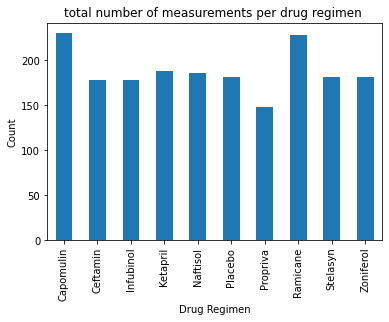

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total= mice_data.groupby(["Drug Regimen"])["Mouse ID"].count()
total.plot(kind= "bar")
plt.title("total number of measurements per drug regimen ")
plt.ylabel("Count")
plt.savefig("Images/bar_plot.png")


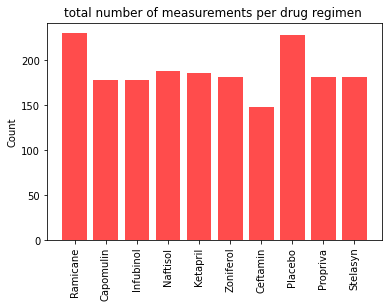

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x= mice_data["Drug Regimen"].unique()
y= (mice_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
plt.bar(x, y, color='r', alpha=0.7, align="center")
plt.xticks(rotation=90)
plt.title("total number of measurements per drug regimen ")
plt.ylabel("Count")
plt.savefig("Images/bar_pyplot.png")

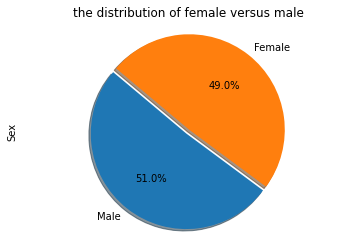

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex= mice_data["Sex"].value_counts()
explode= (0.05,0)
gender_pie = sex.plot(kind="pie", explode= explode, title= "the distribution of female versus male", startangle=140, autopct="%1.1f%%", shadow= True)

plt.axis("equal")
plt.savefig("Images/pie_plot.png")

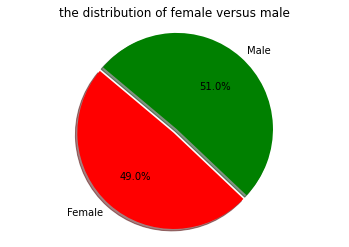

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female= mice_data.loc[mice_data["Sex"]== "Female", "Mouse ID"].count()
male= mice_data.loc[mice_data["Sex"]== "Male", "Mouse ID"].count()
total= ([female, male])
Sex= ["Female", "Male"]
colors= ["r", "green"]
explode= (0.05,0)
plt.pie(total, explode= explode, labels= Sex,colors= colors, startangle=140, autopct="%1.1f%%", shadow= True )
plt.title("the distribution of female versus male")
plt.axis("equal")
plt.savefig("Images/pie_pyplot.png")


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 

# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = mice_data.loc[mice_data["Drug Regimen"]=="Capomulin",:]
ramicane = mice_data.loc[mice_data["Drug Regimen"]=="Ramicane",:]
infubinol = mice_data.loc[mice_data["Drug Regimen"]=="Infubinol",:]
ceftamin = mice_data.loc[mice_data["Drug Regimen"]=="Ceftamin",:]
# Start by getting the last (greatest) timepoint for each mouse
cap_time= capomulin.groupby(["Mouse ID"])["Timepoint"].max()
ram_time = ramicane.groupby(["Mouse ID"])["Timepoint"].max()
inf_time= infubinol.groupby(["Mouse ID"])["Timepoint"].max()
cef_time = ceftamin.groupby(["Mouse ID"])["Timepoint"].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_df= pd.merge(capomulin, cap_time,how= "inner", on=("Mouse ID", "Timepoint"))
ramicane_df= pd.merge(ramicane, ram_time,how= "inner", on=("Mouse ID", "Timepoint"))
infubinol_df= pd.merge(infubinol, inf_time,how= "inner", on=("Mouse ID", "Timepoint"))
ceftamin_df= pd.merge(ceftamin, cef_time,how= "inner", on=("Mouse ID", "Timepoint"))
ramicane_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,g791,Ramicane,Male,11,16,45,29.128472,1
2,s508,Ramicane,Male,1,17,45,30.276232,0
3,m546,Ramicane,Male,18,16,45,30.564625,1
4,z578,Ramicane,Male,11,16,45,30.638696,0
5,n364,Ramicane,Male,4,17,45,31.095335,1
6,j913,Ramicane,Female,4,17,45,31.560470,1
7,a644,Ramicane,Female,7,17,45,32.978522,1
8,c758,Ramicane,Male,9,17,45,33.397653,1
9,i177,Ramicane,Male,10,18,45,33.562402,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list= (mice_data["Drug Regimen"].unique().tolist())

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Capo_vol= capomulin_df["Tumor Volume (mm3)"]
Rami_vol= ramicane_df["Tumor Volume (mm3)"]
infi_vol= infubinol_df["Tumor Volume (mm3)"]
ceft_vol= ceftamin_df["Tumor Volume (mm3)"]

    
   
    

In [17]:
#capomulin IQR and outlier
quartiles = Capo_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volume is: {lowerq}")
print(f"The upper quartile of volume is: {upperq}")
print(f"The interquartile range of volume is: {iqr}")
print(f"The the median of volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of volume is: 32.37735684
The upper quartile of volume is: 40.1592203
The interquartile range of volume is: 7.781863460000004
The the median of volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [18]:
#ramicane IQR and outlier
ram_quartiles = Rami_vol.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

print(f"The lower quartile of volume is: {ram_lowerq}")
print(f"The upper quartile of volume is: {ram_upperq}")
print(f"The interquartile range of volume is: {ram_iqr}")
print(f"The the median of volume is: {ram_quartiles[0.5]} ")

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

The lower quartile of volume is: 31.56046955
The upper quartile of volume is: 40.65900627
The interquartile range of volume is: 9.098536719999998
The the median of volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [19]:
#infubinol IQR and outlier
inf_quartiles = infi_vol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

print(f"The lower quartile of volume is: {inf_lowerq}")
print(f"The upper quartile of volume is: {inf_upperq}")
print(f"The interquartile range of volume is: {inf_iqr}")
print(f"The the median of volume is: {inf_quartiles[0.5]} ")

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")

The lower quartile of volume is: 54.04860769
The upper quartile of volume is: 65.52574285
The interquartile range of volume is: 11.477135160000003
The the median of volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [20]:
#ceftamin IQR and outlier
cef_quartiles = ceft_vol.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq

print(f"The lower quartile of volume is: {cef_lowerq}")
print(f"The upper quartile of volume is: {cef_upperq}")
print(f"The interquartile range of volume is: {cef_iqr}")
print(f"The the median of volume is: {cef_quartiles[0.5]} ")

cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")

The lower quartile of volume is: 48.72207785
The upper quartile of volume is: 64.29983003
The interquartile range of volume is: 15.577752179999997
The the median of volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


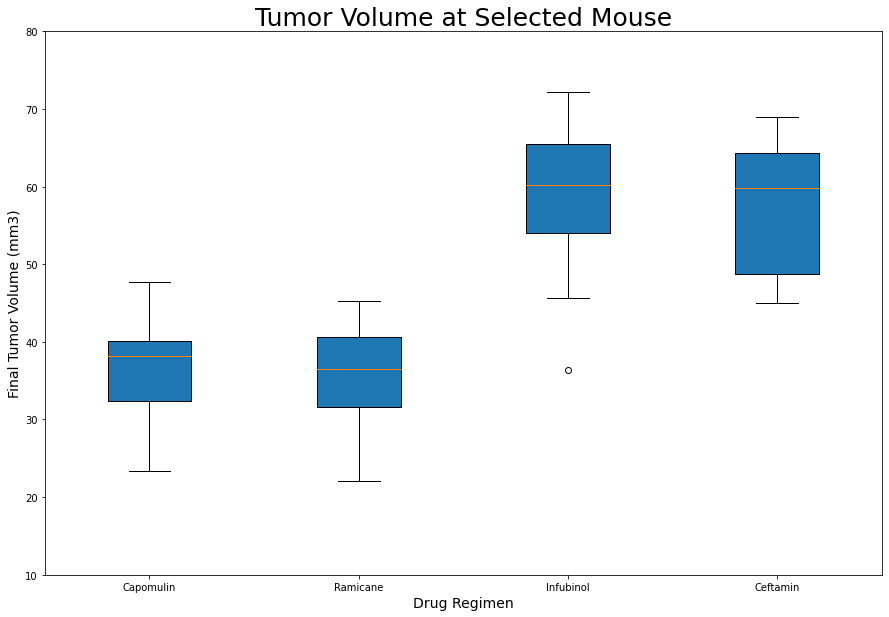

In [21]:
#Generate boxplot
data_to_plot = [Capo_vol, Rami_vol, infi_vol, ceft_vol]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.savefig("Images/box_plot.png")

plt.show()

## Line and Scatter Plots

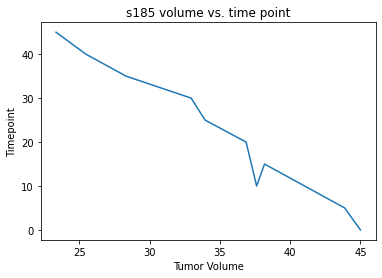

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin Mouse 
mouse= mice_data.loc[mice_data["Drug Regimen"]== "Capomulin" , :]
mouse_id= mice_data.loc[mice_data["Mouse ID"]== "s185",:]
x= (mouse_id["Tumor Volume (mm3)"].tolist())
y= (mouse_id["Timepoint"].tolist())
#Timepoint	Tumor Volume (mm3)
plt.plot(x,y)
plt.title("s185 volume vs. time point")
plt.xlabel("Tumor Volume")
plt.ylabel("Timepoint")
plt.savefig("Images/line_plot.png")

/Users/gninetdagnogo/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


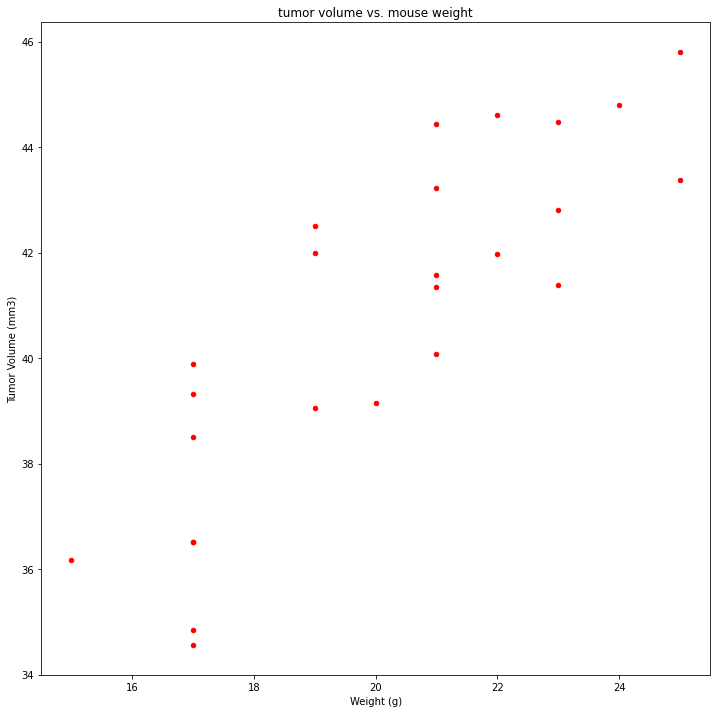

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse= mice_data.loc[mice_data["Drug Regimen"]== "Capomulin" , :]
avg_tumor= mouse.groupby(["Mouse ID"])["Tumor Volume (mm3)", "Weight (g)"].mean()
avg_tumor.plot(kind="scatter", x="Weight (g)", y= "Tumor Volume (mm3)",color= "red",figsize= (12,12), title= "tumor volume vs. mouse weight")
plt.savefig("Images/scatter_plot.png")

## Correlation and Regression

The correlation between both factors is 0.84


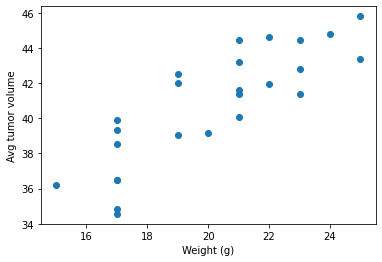

<Figure size 432x288 with 0 Axes>

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#correlation coefficient
tumor= avg_tumor.iloc[:,0]
weight = avg_tumor.iloc[:,1]
correlation = st.pearsonr(weight,tumor)
plt.scatter(weight,tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Avg tumor volume')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()
plt.savefig("Images/scatter_plot2.png")

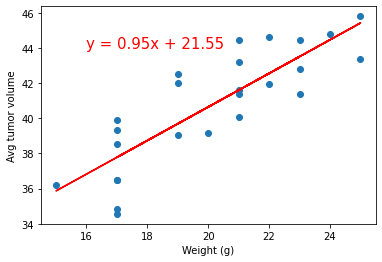

<Figure size 432x288 with 0 Axes>

In [25]:
# Add the linear regression equation and line to plot
x_values = weight
y_values = tumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")

plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Avg tumor volume')

plt.show()
plt.savefig("Images/linear_plot.png")